In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit,LeaveOneOut
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification Results visualization

In [124]:
pathr="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
fnamecl="svm_res_50sam_10ms_clear.csv"
fnameno="svm_res_50sam_10ms_noise.csv"
tadc =pd.read_csv(pathr+fnamecl)
tadn =pd.read_csv(pathr+fnameno)
# print("Total rows: {0}".format(len(d)))
tr=' (50 trials)';

In [125]:
# plt.plot(dataset.iloc[1:,1],dataset.iloc[1:,2],'-dr')
# plt.show()

# Whole  brain

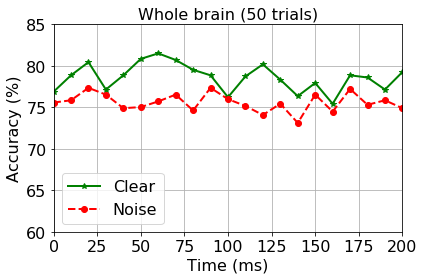

cl: 81.5059445178 
no: 77.3533424284


In [126]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,2]*100;Acdnw1=tadn.iloc[1:,2]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,2]*100), '\n', 'no:',max(tadn.iloc[1:,2]*100)

# LH

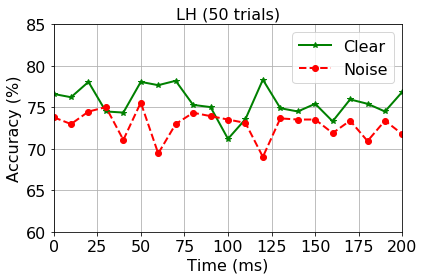

cl: 78.3355350066 
no: 75.5798090041


In [127]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,3]*100;Acdnw1=tadn.iloc[1:,3]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('LH'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,3]*100), '\n', 'no:',max(tadn.iloc[1:,3]*100)

# RH

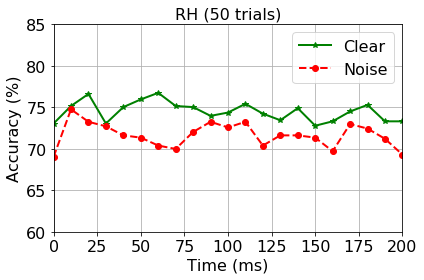

cl: 76.750330251 
no: 74.761255116


In [128]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,4]*100;Acdnw1=tadn.iloc[1:,4]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('RH'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,4]*100), '\n', 'no:',max(tadn.iloc[1:,4]*100)

# Over whole epoch withy Hemisphere

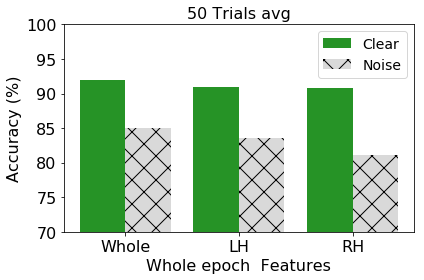

In [113]:
#75sample
n_groups = 3
#50sample
clear = (91.94,90.88,90.75)
noise = (84.99,83.62,81.17)
#75sample
# clear = (91.21,90.81,89.42)
# noise = (87.13,84.56,81.48)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 #color='lightblue','gray'
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='lightgray',
                 label='Noise',
                 hatch="x")
plt.xlabel('Whole epoch  Features',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('50 Trials avg',**axis_font)
plt.ylim(70,100)
plt.xticks(index + bar_width-0.2, ('Whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14)
# plt.grid(True)
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')

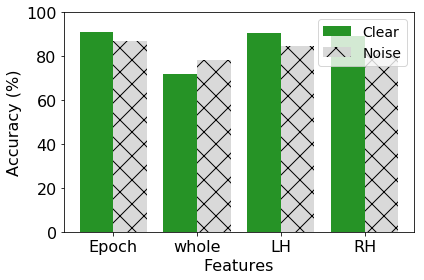

In [57]:
n_groups = 4
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
clear = (91.21,71.875,90.81,89.42)
noise = (87.13,78.125,84.56,81.48)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 #color='lightblue','gray'
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='lightgray',
                 label='Noise',
                 hatch="x")
plt.xlabel('Features',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('LH',**axis_font)
plt.ylim(0,100)
plt.xticks(index + bar_width-0.2, ('Epoch','whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc="best")
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')

In [3]:
# allacc=[];
# for count in range(2,23):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=21*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5].values
#         labels=c.iloc[:,5]
#         print X

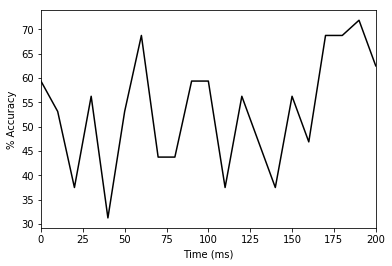

In [4]:
allacc=[];pma=[];lallacc=[];
for count in range(2,23):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=21*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        y=c.iloc[:,5]
        y=np.int64(y)
        #print y
        # Upto this feature extraction
    #print X
    leaveout = LeaveOneOut()
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
        score=totalacc/cn*100.0
    allacc.append(score)
    Acdw=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pma.append(perf)
#     print score
    lacc=accuracy_score(np.array(ytt), np.array(cper))
    lallacc.append(lacc)
    
#     print (perf)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdw,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.xlim(0,200)
plt.show()

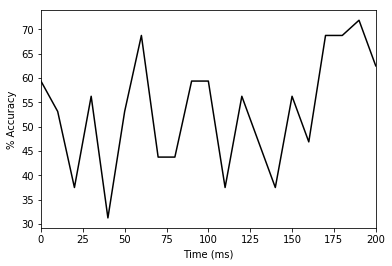

In [5]:
t=np.linspace(0,200,21, endpoint=True)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdw,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.xlim(0,200)
plt.show()
# tt=np.arange(0,210,10)

In [6]:
#print par
time=pd.DataFrame(t)
tadc=pd.concat([time, Acdw],axis=1)
tadc
# print (tadc,lallacc)
#tad.iloc[0:,1]
#tad
# selt=tad.iloc[2:21]
# av=selt.max()
#print selt,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[20:42]
#tad.to_csv('clear_whole_v4.csv')

,0,0
0,0.0,59.375
1,10.0,53.125
2,20.0,37.500
3,30.0,56.250
4,40.0,31.250
5,50.0,53.125
6,60.0,68.750
7,70.0,43.750
8,80.0,43.750
9,90.0,59.375


In [11]:
for i in range(len(pma)):
    print i
    print (pma[i])

0
             precision    recall  f1-score   support

          0       0.50      0.31      0.38        13
          1       0.62      0.79      0.70        19

avg / total       0.57      0.59      0.57        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.57      0.89      0.69        19

avg / total       0.34      0.53      0.41        32

2
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.48      0.63      0.55        19

avg / total       0.28      0.38      0.32        32

3
             precision    recall  f1-score   support

          0       0.43      0.23      0.30        13
          1       0.60      0.79      0.68        19

avg / total       0.53      0.56      0.53        32

4
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.43 

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


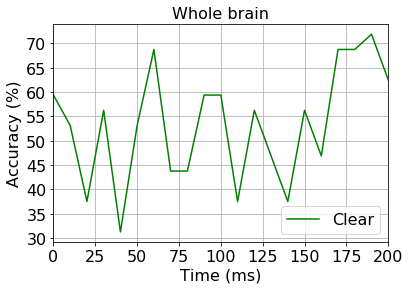

In [7]:
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g')
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
plt.show()

# Classification from RH's two clusters (C1, C2)

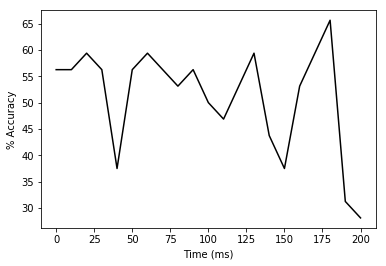

In [8]:
allacc=[];pmarh=[];
for count in range(2,23): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2):
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=21*j
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
        #print X
# Upto this feature extraction
    cn=0; totalacc=0;cper=[];ytt=[];
    leaveout = LeaveOneOut()
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdrh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmarh.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
#t=np.linspace(-10,200,106)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdrh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [9]:
#print par
time=pd.DataFrame(t)
tadrh=pd.concat([time, Acdrh],axis=1)
# tadrh
# seltrh=tadrh.iloc[5:106]
# avrh=seltrh.max()
#print seltrh
#print avrh,'\n','The average accuracy over the time is:', avrh.iloc[1]*1.0
#print tad.iloc[20:42]
#tadrh.to_csv('clear_RH_v4.csv')

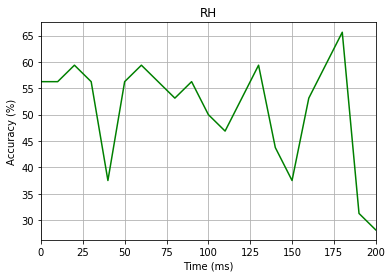

In [10]:
trh1=tadrh.iloc[0:,0];Acdrh1=tadrh.iloc[0:,1];
plt.plot(trh1,Acdrh1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('Accuracy (%)')
plt.title('RH')
plt.xlim(0,200)
plt.grid(True)
plt.show()

In [11]:
tadrh

,0,0
0,0.0,56.250
1,10.0,56.250
2,20.0,59.375
3,30.0,56.250
4,40.0,37.500
5,50.0,56.250
6,60.0,59.375
7,70.0,56.250
8,80.0,53.125
9,90.0,56.250


In [12]:
for i in range(len(pmarh)):
    print i
    print (pmarh[i])

0
             precision    recall  f1-score   support

          0       0.40      0.15      0.22        13
          1       0.59      0.84      0.70        19

avg / total       0.51      0.56      0.50        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.58      0.95      0.72        19

avg / total       0.34      0.56      0.43        32

2
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.59      1.00      0.75        19

avg / total       0.35      0.59      0.44        32

3
             precision    recall  f1-score   support

          0       0.40      0.15      0.22        13
          1       0.59      0.84      0.70        19

avg / total       0.51      0.56      0.50        32

4
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.48 

# Classification from LH's two clusters (C3, C4)

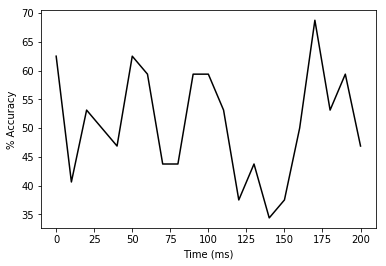

In [13]:
allacc=[];pmalh=[];lhallacc=[];
for count in range(2,23): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=21*j
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
# Upto this feature extraction
    leaveout = LeaveOneOut()  
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdlh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmalh.append(perf)
#     print (perf)
    lhacc=accuracy_score(np.array(ytt), np.array(cper))
    lhallacc.append(lhacc)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
# t=np.linspace(-10,200,106)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdlh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [14]:
#print par
timelh=pd.DataFrame(t)
tadlh=pd.concat([timelh, Acdlh],axis=1)
tadlh
# seltlh=tadlh.iloc[5:106]
# avlh=seltlh.max()
#print avlh
#print seltlh,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[40:60]
#tadlh.to_csv('clear_LH_v4.csv')

,0,0
0,0.0,62.500
1,10.0,40.625
2,20.0,53.125
3,30.0,50.000
4,40.0,46.875
5,50.0,62.500
6,60.0,59.375
7,70.0,43.750
8,80.0,43.750
9,90.0,59.375


In [20]:
# lhallacc

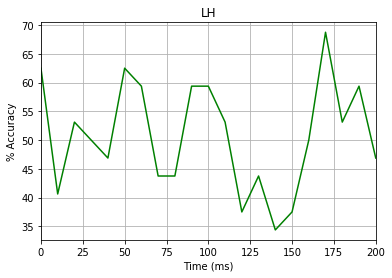

In [15]:
# tlh1=tadlh.iloc[5:,0];Acdlh1=tadlh.iloc[5:,1];
tlh1=tadlh.iloc[0:,0];Acdlh1=tadlh.iloc[0:,1];
plt.plot(tlh1,Acdlh1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.title('LH')
plt.xlim(0,200)
plt.grid(True)
plt.show()

In [16]:
tadlh
# t=np.linspace(0,200,21)
# t

,0,0
0,0.0,62.500
1,10.0,40.625
2,20.0,53.125
3,30.0,50.000
4,40.0,46.875
5,50.0,62.500
6,60.0,59.375
7,70.0,43.750
8,80.0,43.750
9,90.0,59.375


In [23]:
for i in range(len(pmalh)):
    print i
    print (pmalh[i])

0
             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.67      0.74      0.70        19

avg / total       0.62      0.62      0.62        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.50      0.68      0.58        19

avg / total       0.30      0.41      0.34        32

2
             precision    recall  f1-score   support

          0       0.43      0.46      0.44        13
          1       0.61      0.58      0.59        19

avg / total       0.54      0.53      0.53        32

3
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.55      0.84      0.67        19

avg / total       0.33      0.50      0.40        32

4
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.54 

# Noise-degraded speech

# Classification of noise-degraded speech-detection

In [24]:
pathr="/home/sultan/EEG/CLUSTER_channels/S_E12/"
#fnamecl='Allsuballnoise.xlsx'
#pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
#fnamecl='Allrownc5v2.xlsx'
fnamecl='All10msnoise.xlsx'
dn=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


# Whole brain 

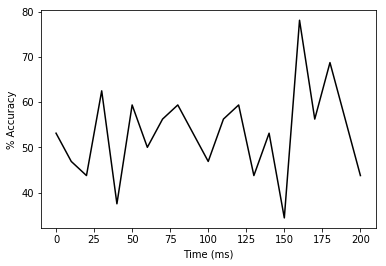

In [25]:
allacc=[];pman=[];#All acc;all performance matrics
for count in range(2,23):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=dn.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=21*j
            a.append(dd)      
        y=dn.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        y=c.iloc[:,5]
        y=np.int64(y); # convereting float to numpyarray
        #print y
        # Upto this feature extraction
    #print X
    leaveout = LeaveOneOut()
    cn=0; totalacc=0;cper=[];ytt=[];#cn=counter;totalcount; prediction; ytt test true
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdnw=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pman.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
# t=np.linspace(-10,200,21)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdnw,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [26]:
#print par
time=pd.DataFrame(t)
tadnw=pd.concat([time, Acdnw],axis=1)
tadnw
# seltnw=tadnw.iloc[1:21]
# avnw=seltnw.max()
#print avnw
#print seltnw,'\n','The average accuracy over the time is:', avnw.iloc[1]*1.0
#print tad.iloc[20:42]
#tadnw.to_csv('Noise_whole_v4.csv')

,0,0
0,0.0,53.125
1,10.0,46.875
2,20.0,43.750
3,30.0,62.500
4,40.0,37.500
5,50.0,59.375
6,60.0,50.000
7,70.0,56.250
8,80.0,59.375
9,90.0,53.125


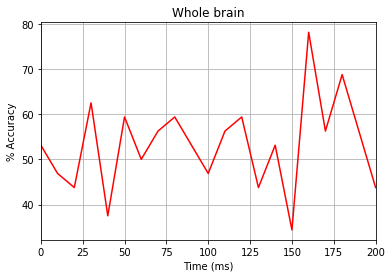

In [27]:
# tw1=tadnw.iloc[1:,0];Acdw1=tadnw.iloc[1:,1];
twn1=tadnw.iloc[0:,0];Acdnw1=tadnw.iloc[0:,1];
plt.plot(twn1,Acdnw1,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.xlim(0,200)
plt.grid(True)
plt.title('Whole brain')
plt.show()

In [28]:
for i in range(len(pman)):
    print i
    print (pman[i])

0
             precision    recall  f1-score   support

          0       0.42      0.38      0.40        13
          1       0.60      0.63      0.62        19

avg / total       0.53      0.53      0.53        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.54      0.79      0.64        19

avg / total       0.32      0.47      0.38        32

2
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.52      0.74      0.61        19

avg / total       0.31      0.44      0.36        32

3
             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.67      0.74      0.70        19

avg / total       0.62      0.62      0.62        32

4
             precision    recall  f1-score   support

          0       0.11      0.08      0.09        13
          1       0.48 

# Classification from RH's two clusters (C1, C2)

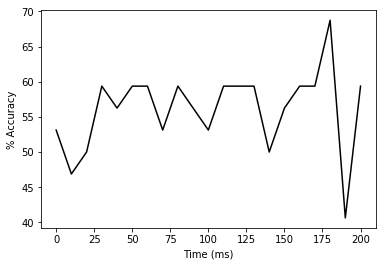

In [29]:
allacc=[];pmanrh=[];
for count in range(2,23): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2):
            #print i,k
            dd=dn.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=21*j
            a.append(dd) # append features      
        y=dn.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
        #print X
# Upto this feature extraction
    cn=0; totalacc=0;cper=[];ytt=[];
    leaveout = LeaveOneOut()
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdnrh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmanrh.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
# t=np.linspace(-10,200,106)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdnrh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [30]:
#print par
time=pd.DataFrame(t)
tadnrh=pd.concat([time, Acdnrh],axis=1)
tadnrh
# seltnrh=tadnrh.iloc[5:106]
# avnrh=seltnrh.max()
#print avnrh
#print seltnrh,'\n','The average accuracy over the time is:', avnrh.iloc[1]*1.0
#print tad.iloc[20:42]
#tadnrh.to_csv('noise_RH_v4.csv')

,0,0
0,0.0,53.125
1,10.0,46.875
2,20.0,50.000
3,30.0,59.375
4,40.0,56.250
5,50.0,59.375
6,60.0,59.375
7,70.0,53.125
8,80.0,59.375
9,90.0,56.250


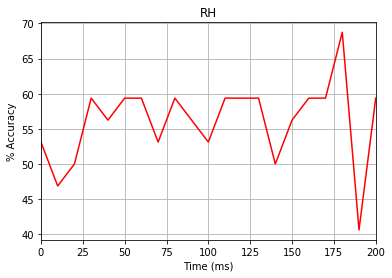

In [31]:
# trh1=tadnrh.iloc[5:,0];Acdnrh1=tadnrh.iloc[5:,1];
tnrh1=tadnrh.iloc[0:,0];Acdnrh1=tadnrh.iloc[0:,1];
plt.plot(tnrh1,Acdnrh1,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.xlim(0,200)
plt.grid(True)
plt.title('RH')
plt.show()

In [32]:
for i in range(len(pmanrh)):
    print i
    print (pmanrh[i])

0
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.57      0.89      0.69        19

avg / total       0.34      0.53      0.41        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.54      0.79      0.64        19

avg / total       0.32      0.47      0.38        32

2
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.55      0.84      0.67        19

avg / total       0.33      0.50      0.40        32

3
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.59      1.00      0.75        19

avg / total       0.35      0.59      0.44        32

4
             precision    recall  f1-score   support

          0       0.46      0.46      0.46        13
          1       0.63 

# Classification from LH's two clusters (C3, C4)

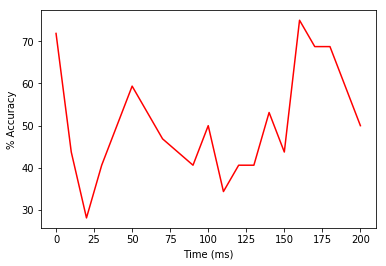

In [33]:
allacc=[];pmanlh=[];
for count in range(2,23): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=21*j
            #print i,k
            dd=dn.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=dn.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
# Upto this feature extraction
    leaveout = LeaveOneOut()  
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdnlh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmanlh.append(perf)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
# t=np.linspace(-10,200,106)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdnlh,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [34]:
timelh=pd.DataFrame(t)
tadnlh=pd.concat([timelh, Acdnlh],axis=1)
# tadnlh

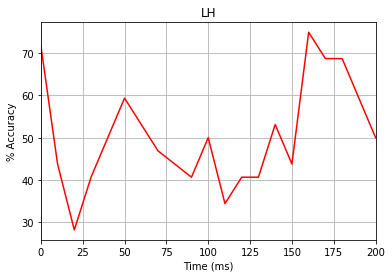

In [35]:
# tlh1=tadnlh.iloc[5:,0];Acdnlh1=tadnlh.iloc[5:,1];
tnlh1=tadnlh.iloc[0:,0];Acdnlh1=tadnlh.iloc[0:,1];
plt.plot(tnlh1,Acdnlh1,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.xlim(0,200)
plt.grid(True)
plt.title('LH')
plt.show()

In [36]:
tadnlh

,0,0
0,0.0,71.875
1,10.0,43.750
2,20.0,28.125
3,30.0,40.625
4,40.0,50.000
5,50.0,59.375
6,60.0,53.125
7,70.0,46.875
8,80.0,43.750
9,90.0,40.625


In [37]:
for i in range(len(pmanlh)):
    print i
    print (pmanlh[i])

0
             precision    recall  f1-score   support

          0       0.64      0.69      0.67        13
          1       0.78      0.74      0.76        19

avg / total       0.72      0.72      0.72        32

1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.52      0.74      0.61        19

avg / total       0.31      0.44      0.36        32

2
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.41      0.47      0.44        19

avg / total       0.24      0.28      0.26        32

3
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.50      0.68      0.58        19

avg / total       0.30      0.41      0.34        32

4
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.55 

# Clear and noise together figure

# whole brain

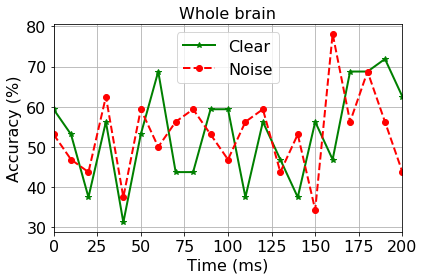

In [47]:
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

# RH

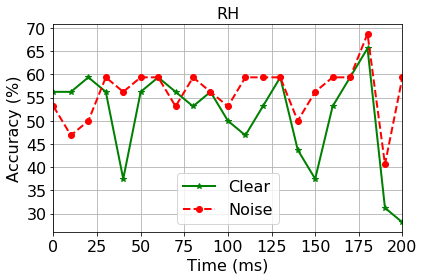

In [49]:
tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(trh1,Acdrh1,'g',linewidth=2,marker='*')
plt.plot(tnrh1,Acdnrh1,'--r',linewidth=2, marker='o')
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('RH',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
plt.savefig('RH_acc_timem.eps')
plt.savefig('RH_acc_timem.tif')
plt.show()

# LH

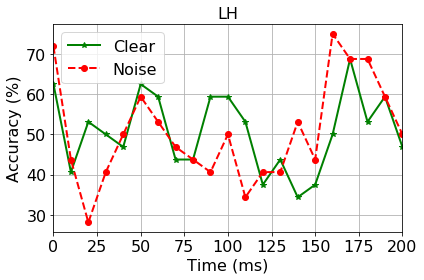

In [50]:
tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tlh1,Acdlh1,'g',linewidth=2, marker='*')
# plt.plot(tnlh1,Acdnlh1,'--r',linewidth=2)
plt.plot(tnlh1,Acdnlh1,'r',linestyle='dashed',linewidth=2, marker='o')
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('LH',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
plt.savefig('LH_acc_timem.eps')
plt.savefig('LH_acc_timem.tif')
plt.show()

# Clear maximum accuracuracy versus latency

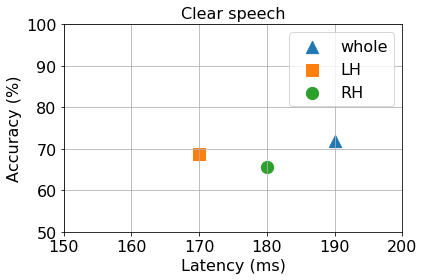

In [28]:

cw=[71.875 ];ctw=[190.0];
clh=[68.750];ctlh=[170]
crh=[65.625];ctrh=[180]
# This is data for clear 
cacc=[71.875,68.750,65.625]
ctt=[190.0,170.0, 180.0]
# This data for the noise-degraded sound
nacc=[78.125,75.00,68.750]
ntt=[160.0,160.0, 180.0]
plt.scatter(ctw, cw, marker='^',s=150)
plt.scatter(ctlh, clh,marker='s',s=150,alpha=1.0)
plt.scatter(ctrh, crh,s=150,cmap='spectral')
plt.ylim(50,100)
# plt.plot(,Acdnlh1,'r',linestyle='dashed',linewidth=2)
plt.xlim(150,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Latency (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Clear speech',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('whole','LH','RH'),fontsize=16,loc='best')
plt.savefig('Clear_max_acc_time.eps')
plt.savefig('Clear_max_acc_time.tif')
plt.show()

# Noise degraded

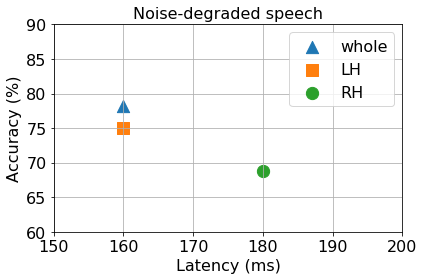

In [29]:

# cw=[71.875 ];ctw=[190.0];
# clh=[68.750];ctlh=[170]
# crh=[65.625];ctrh=[180]
# # This is data for clear 
# cacc=[71.875,68.750,65.625]
# ctt=[190.0,170.0, 180.0]
# This data for the noise-degraded sound
nacc=[78.125,75.00,68.750]
ntt=[160.0,160.0, 180.0]
plt.scatter(ntt[0], nacc[0], marker='^',s=150)
plt.scatter(ntt[1], nacc[1],marker='s',s=150,alpha=1.0)
plt.scatter(ntt[2], nacc[2],s=150,cmap='spectral')
plt.ylim(60,90)
# plt.plot(,Acdnlh1,'r',linestyle='dashed',linewidth=2)
plt.xlim(150,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Latency (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Noise-degraded speech',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('whole','LH','RH'),fontsize=16,loc='best')
plt.savefig('Noise_max_acc_time.eps')
plt.savefig('Noise_max_acc_time.tif')
plt.show()

# Bar chart 

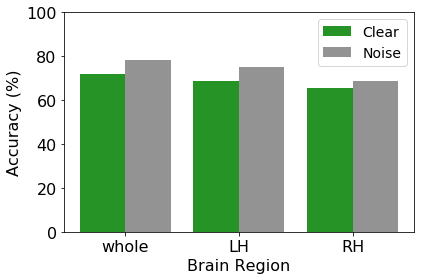

In [30]:
n_groups = 3
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
clear = (71.875,68.750,65.625)
noise = (78.125,75.00,68.750)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Brain Region',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('LH',**axis_font)
plt.ylim(0,100)
plt.xticks(index + bar_width-0.2, ('whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')

# Latency

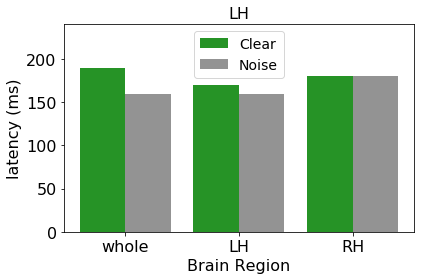

In [31]:
n_groups = 3
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
clear = (190.0,170.0, 180.0)
noise = (160.0,160.0, 180.0)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Brain Region',**axis_font)
plt.ylabel('latency (ms)',**axis_font)
plt.title('LH',**axis_font)
plt.ylim(0,240)
plt.xticks(index + bar_width-0.2, ('whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')

# Scatter plot

<function matplotlib.pyplot.show>

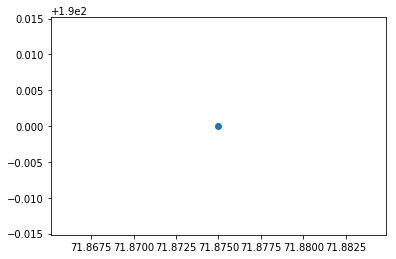

In [146]:
# cw=[71.875 ];ctw=[190.0];
# clh=[68.750];ctlh=[170]
# crh=[65.625];ctrh=[180]
# plt.scatter(cw,ctw)
# plt.show

In [ ]:
## 

In [57]:
def rocurrve(ytt,cper):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(ytt), np.array(cper))
    #false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(pred, y_test)
    #print false_positive_rate
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print 'FPR=',false_positive_rate,'\n','TPR=',true_positive_rate
    fig,ax1=plt.subplots(ncols=1)
    ax1.plot(false_positive_rate, true_positive_rate, 'b-', label = 'AUC = %0.2f' % roc_auc)
    ax1.legend(loc = 'lower right')
    ax1.plot([0, 1], [0, 1],'r--')
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1])
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_title('Receiver Operating Characteristic')
    plt.show()

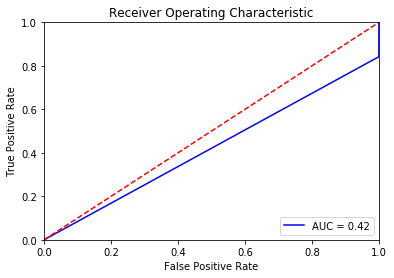

In [58]:
rocurrve(ytt,cper)

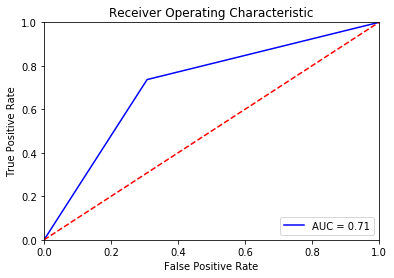

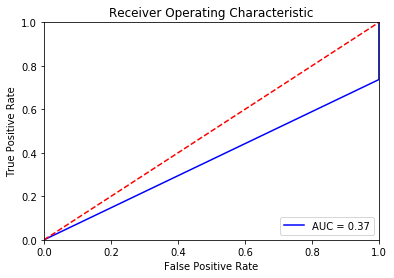

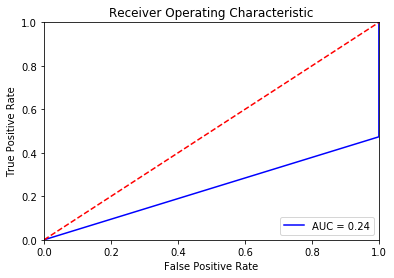

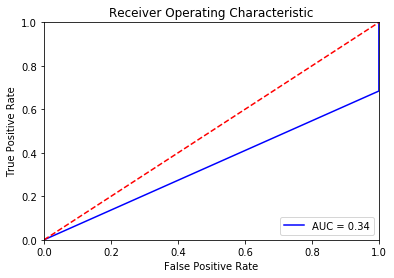

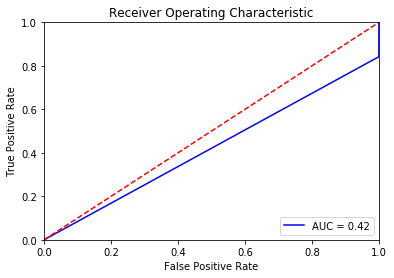

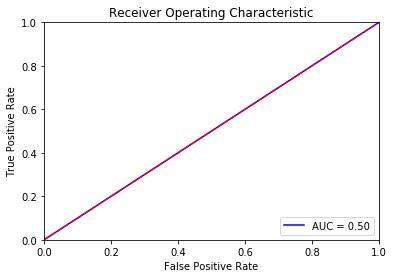

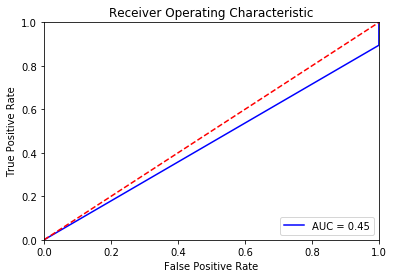

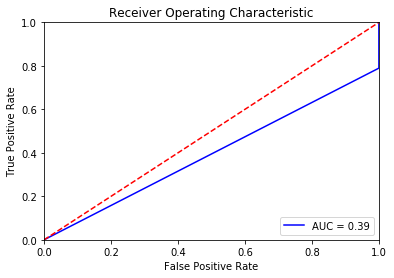

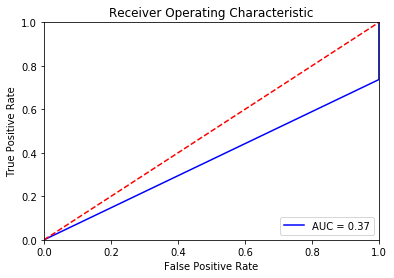

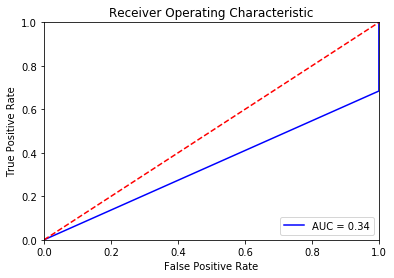

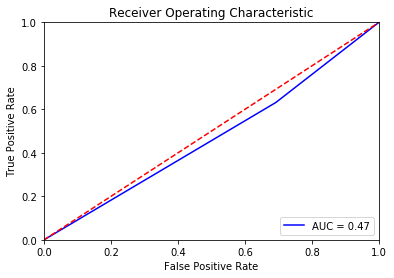

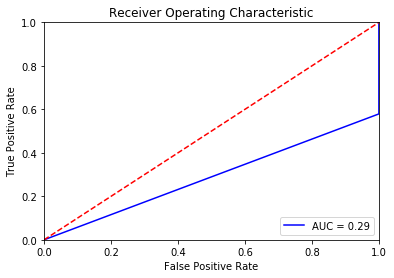

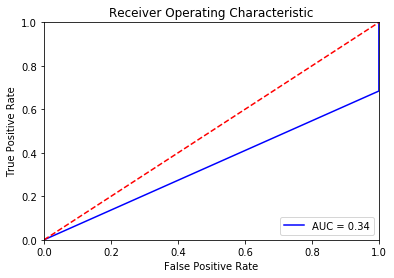

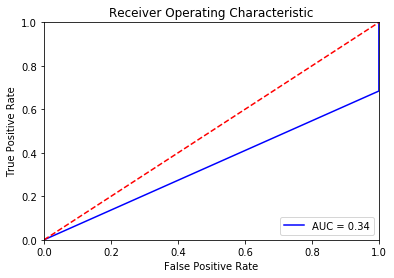

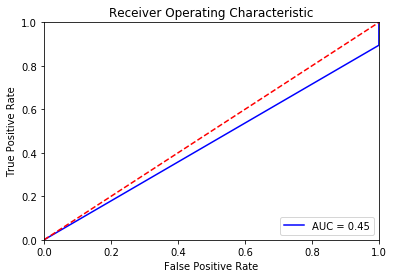

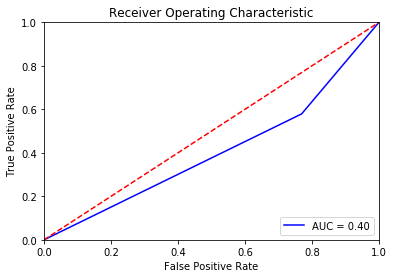

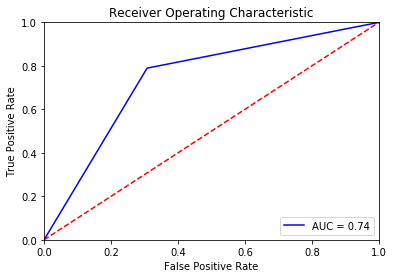

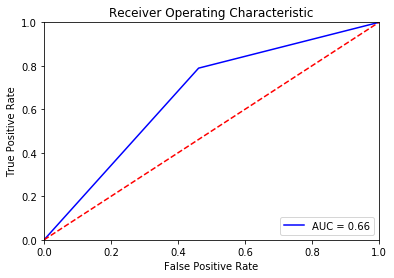

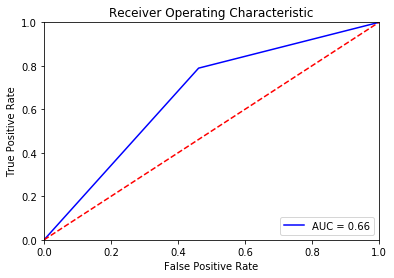

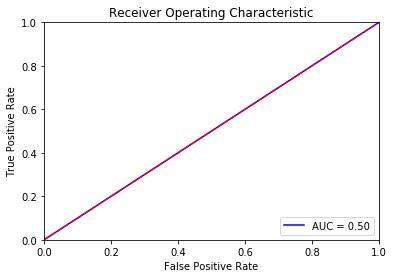

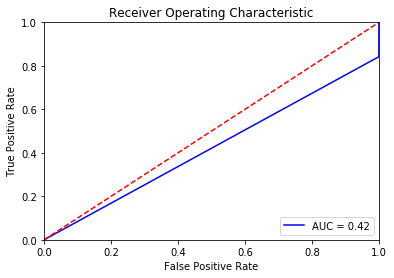

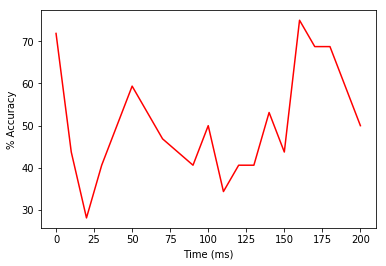

In [59]:
allacc=[];pmanlh=[];
for count in range(2,23): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=21*j
            #print i,k
            dd=dn.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=dn.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        y=np.int64(y)
# Upto this feature extraction
    leaveout = LeaveOneOut()  
    cn=0; totalacc=0;cper=[];ytt=[];
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        pred=clf.best_estimator_.predict(X_tst)
        cper.append(pred)
        ytt.append(y_tst)
        #print cn, acc, totalacc; # See the how many correct over the whole
    score=totalacc/cn*100.0
    allacc.append(score)
    Acdnlh=pd.DataFrame(allacc)
    perf=classification_report(np.array(ytt), np.array(cper))
    pmanlh.append(perf)
    rocurrve(ytt,cper)
#     print score
#     print (accuracy_score(np.array(ytt), np.array(cper))*100.0)
#     print (perf)
# t=np.linspace(-10,200,106)
t=np.linspace(0,200,21)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdnlh,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()